https://colab.research.google.com/github/Gurobi/modeling-examples/blob/master/facility_location/facility_location.ipynb

In [1]:
import math
math.comb(1274, 2)

810901

길찾기는 하루 1만건 가능함.  
만약 서초3구 모든 경계구사이 거리 다 구하려면 81만 개 필요  
-> 가장 가까운 지점까지 시간만 구하고 그거 토대로 최적화하는법 연구(메타휴리스틱)  

카카오 길찾기
https://developers.kakaomobility.com/docs/navi-api/directions/  
  
rest api 키  
	f8df45aec27d46580551f1fe6b0bcadd  

scikit-opt
https://scikit-opt.github.io/scikit-opt/#/en/README?id=_2-genetic-algorithm

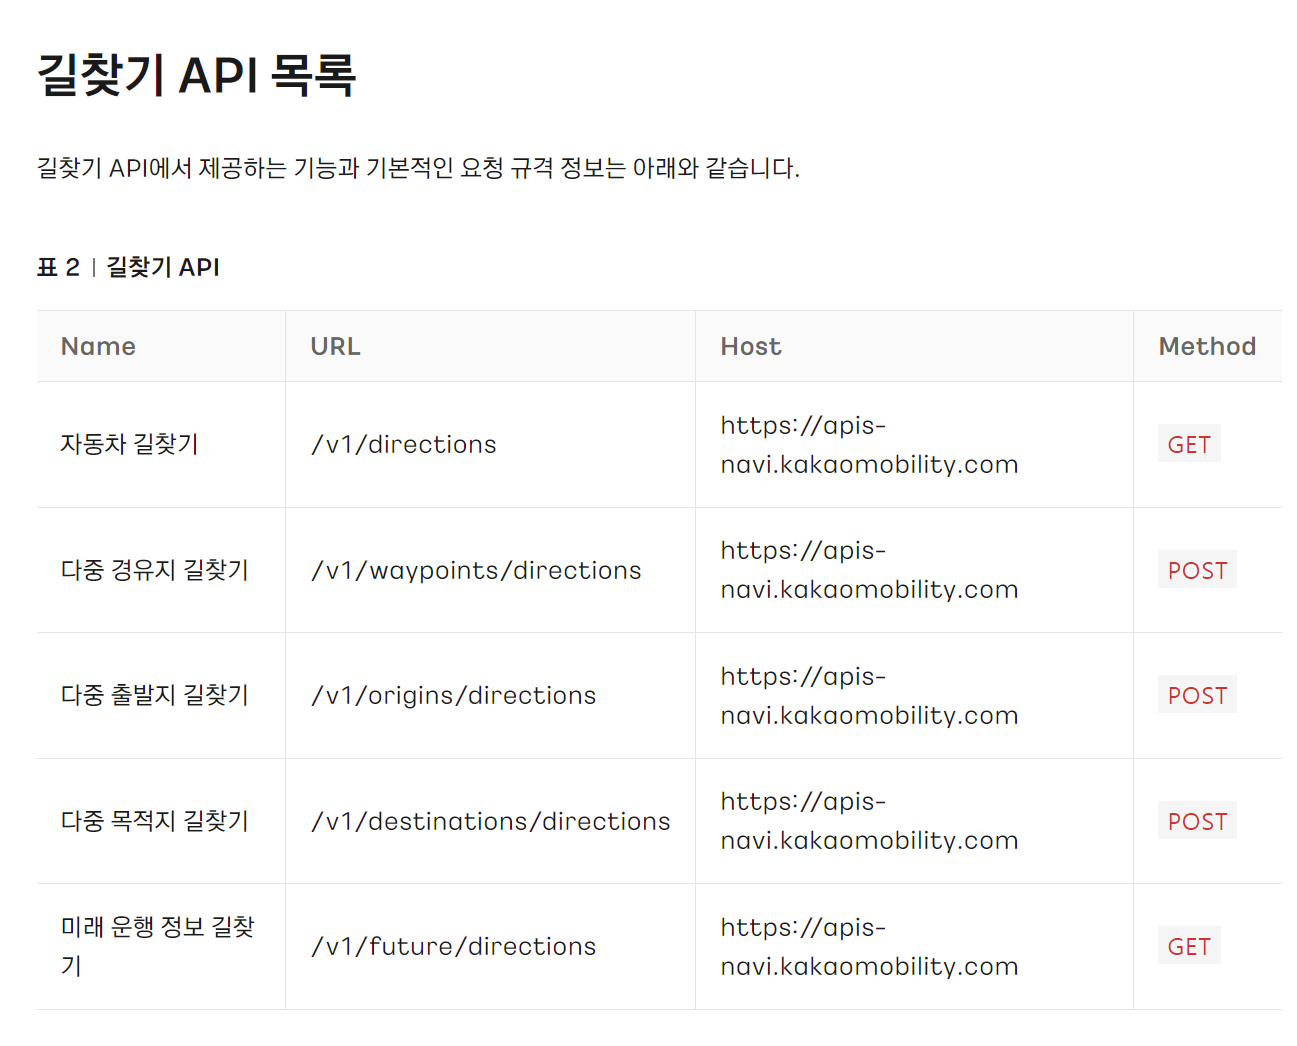

In [1]:
import pickle

# load
with open('./data/강남3구_집계구_경계_중심.pickle', 'rb') as f:
    강남3구_집계구_경계_중심 = pickle.load(f)
강남3구_집계구_경계_중심.reset_index(drop = True, inplace = True)
강남3구_집계구_경계_중심

,gu,TOT_REG_CD,geometry,count,centroid
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",53.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.50790, 127.00223 37.507...",54.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",114.0,POINT (127.04780 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",116.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",60.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
2699,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",146.0,POINT (127.14401 37.48973)
2700,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",63.0,POINT (127.14088 37.51645)
2701,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",51.0,POINT (127.13466 37.51537)
2702,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",66.0,POINT (127.13148 37.47358)


In [8]:
from shapely.geometry import Point

point = Point(127.11645, 37.53175)
# Spatial index 생성
spatial_index = 강남3구_집계구_경계_중심['geometry'].sindex

# Point가 속하는 Polygon 찾기
polygon_index = list(spatial_index.query(point, predicate='intersects'))
polygon_index

[2703]

In [7]:
spatial_index

In [6]:
polygon_index

[]

In [1]:
import math
math.comb(2704, 2)

3654456

In [3]:
base_data = 강남3구_집계구_경계_중심.loc[강남3구_집계구_경계_중심['gu']=='11220', ['count', 'centroid']]
base_data

,count,centroid
0,53.0,POINT (127.02621 37.48978)
1,54.0,POINT (127.00173 37.50763)
2,114.0,POINT (127.04780 37.44425)
3,116.0,POINT (127.06819 37.44481)
4,60.0,POINT (127.02117 37.50097)
...,...,...
668,172.0,POINT (127.01244 37.50246)
669,127.0,POINT (127.01486 37.51595)
670,101.0,POINT (127.02386 37.46103)
671,99.0,POINT (127.01023 37.50807)


In [4]:
import geopandas as gpd
data_주차장위치 = gpd.read_file('./data/data_주차장위치.geojson',driver='GeoJSON')
data_주차장위치 = data_주차장위치.loc[data_주차장위치['구_코드']=='11220', :]
data_주차장위치

ERROR 1: PROJ: proj_create_from_database: Open of /home/yspark/miniconda3/envs/env_tg_db/share/proj failed


,구_코드,행정동_이름,geometry
0,11220,양재1동,"POLYGON ((127.04161 37.48524, 127.04165 37.485..."
1,11220,양재2동,"POLYGON ((127.04455 37.46677, 127.04301 37.465..."
2,11220,내곡동,"POLYGON ((127.08494 37.47566, 127.08470 37.475..."
3,11220,서초2동,"POLYGON ((127.03386 37.48434, 127.03425 37.483..."
4,11220,반포본동,"POLYGON ((126.99223 37.50663, 126.99215 37.506..."
5,11220,서초4동,"POLYGON ((127.02511 37.50317, 127.02523 37.502..."
6,11220,반포1동,"POLYGON ((127.01922 37.50304, 127.01913 37.503..."
7,11220,방배1동,"POLYGON ((127.00174 37.48310, 127.00185 37.482..."
8,11220,잠원동,"POLYGON ((127.00858 37.52560, 127.00859 37.525..."
9,11220,서초1동,"POLYGON ((127.02655 37.48184, 127.02698 37.480..."


In [5]:
# data_주차장위치.to_file('./data/data_주차장위치.geojson', driver = 'GeoJSON')

In [6]:
data_주차장위치['centroid'] = data_주차장위치['geometry'].centroid
data_주차장위치

/tmp/ipykernel_53263/3200636253.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_주차장위치['centroid'] = data_주차장위치['geometry'].centroid


,구_코드,행정동_이름,geometry,centroid
0,11220,양재1동,"POLYGON ((127.04161 37.48524, 127.04165 37.485...",POINT (127.02250 37.46950)
1,11220,양재2동,"POLYGON ((127.04455 37.46677, 127.04301 37.465...",POINT (127.04575 37.45115)
2,11220,내곡동,"POLYGON ((127.08494 37.47566, 127.08470 37.475...",POINT (127.07063 37.45586)
3,11220,서초2동,"POLYGON ((127.03386 37.48434, 127.03425 37.483...",POINT (127.02791 37.48883)
4,11220,반포본동,"POLYGON ((126.99223 37.50663, 126.99215 37.506...",POINT (126.98756 37.50421)
5,11220,서초4동,"POLYGON ((127.02511 37.50317, 127.02523 37.502...",POINT (127.01981 37.49895)
6,11220,반포1동,"POLYGON ((127.01922 37.50304, 127.01913 37.503...",POINT (127.01676 37.50553)
7,11220,방배1동,"POLYGON ((127.00174 37.48310, 127.00185 37.482...",POINT (126.99626 37.48488)
8,11220,잠원동,"POLYGON ((127.00858 37.52560, 127.00859 37.525...",POINT (127.01274 37.51708)
9,11220,서초1동,"POLYGON ((127.02655 37.48184, 127.02698 37.480...",POINT (127.02010 37.48694)


In [7]:
# 18116

In [8]:
import pickle
dict_주차장_고객_거리 = {}
# load
with open('./data/수리적최적화_지점간거리.pickle', 'rb') as f:
    dict_주차장_고객_거리 = pickle.load(f)
len(dict_주차장_고객_거리)

181168

In [9]:
# from src.주차배치최적화 import 주차장거리_해계산기
# from hyperopt import hp, Trials, tpe, fmin
# 주차장개수 = 4
# solver = 주차장거리_해계산기(data_고객위치 = base_data, data_주차장위치 = data_주차장위치,
#                     dict_주차장_고객_거리 = dict_주차장_고객_거리, 
#                     주차장개수 = 주차장개수)
# space = {'결정변수': [hp.randint(str(x), len(solver.data_주차장위치)) for x in range(주차장개수)]}
# trials = Trials()
# best = fmin(fn= solver.hopt_func,
#             space= space,
#             algo= tpe.suggest,
#             max_evals = 10000,
#             trials= trials,
#            # timeout = 68400
#            )

# # 최적의 하이퍼파라미터 조합
# best

In [10]:
from src.hyperopt import hyperopt_병렬처리

In [11]:
solver = hyperopt_병렬처리(주차장개수 = 4, 
                       data_고객위치 = base_data, 
                       data_주차장위치 = data_주차장위치.loc[:, ['centroid']], 
                       dict_주차장_고객_거리 = dict_주차장_고객_거리, num_cpus = 4)

2024-04-03 14:03:29,722	INFO worker.py:1752 -- Started a local Ray instance.


In [12]:
solver.최적화실행(timeout = 360)

 15%|█▍        | 1476/10000 [06:00<34:39,  4.10trial/s, best loss: 37891613.0] [repeated 2x across cluster]


[({'0': 8, '1': 7, '2': 0, '3': 9}, 37913901.0),
 ({'0': 8, '1': 7, '2': 0, '3': 9}, 37913901.0),
 ({'0': 0, '1': 5, '2': 9, '3': 7}, 37891613.0),
 ({'0': 9, '1': 7, '2': 5, '3': 0}, 37891613.0)]

In [13]:
from src.주차배치최적화 import 주차장거리_해계산기
ㅁ = 주차장거리_해계산기(주차장개수 = 4, 
                       data_고객위치 = base_data, 
                       data_주차장위치 = data_주차장위치.loc[:, ['centroid']], 
                       dict_주차장_고객_거리 = dict_주차장_고객_거리)

In [16]:
ㅁ._01_해입력([0, 5, 7, 9])

입력해:  [0, 5, 7, 9]


In [15]:
asdg

NameError: name 'asdg' is not defined

In [ ]:
49000000*153/(153+31)

In [ ]:
31

In [ ]:
153

In [ ]:
패 = 4/10
승 = 6/10
승리확률 = 0
승리확률 += 패*패*승*승*승
print('누적(+패패승승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+패승패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+패승승패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+패승승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승패패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승패승패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+승패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승승패패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+승승패승)', 승리확률)
승리확률 += 승*승*승
print('누적(+승승승)', 승리확률)

In [3]:
import tsfel
import ray
import numpy as np
import time
import pandas as pd

cfg = tsfel.get_features_by_domain()
# _ = cfg.pop('fractional')

np.random.seed(123)

# 시계열 샘플 데이터 생성 함수
def generate_time_series_data(num_samples, length):
    data = []
    for _ in range(num_samples):
        ts = np.random.rand(length)  # 랜덤 시계열 데이터 생성
        data.append(ts)
    return pd.DataFrame(data)

# 순차적으로 feature 추출하는 함수
def extract_features_sequential(ts_data, cfg=cfg):
    extracted_features = tsfel.time_series_features_extractor(cfg, ts_data, fs=10, verbose=0)
    return extracted_features

# 병렬로 feature 추출하는 함수
@ray.remote
def extract_features_parallel(ts_data, cfg=cfg):
    extracted_features = tsfel.time_series_features_extractor(cfg, ts_data, fs=10, verbose=0)
    return extracted_features

def main():
    df_list = []
    start_time = time.time()

    # Ray를 사용하여 병렬 feature extraction 실시 및 시간 측정
    num_cpus = 3  # 사용할 CPU 수 설정
    ray.init(num_cpus=num_cpus, log_to_driver=False)  # ray 초기 설정 및 로그 수집 비활성화

    for i in range(500):  # 시계열 샘플 데이터 생성
        num_samples = 1400
        length = 200
        data = generate_time_series_data(num_samples, length)
        features_parallel = extract_features_parallel.remote(ray.put(data))
        df_list.append(features_parallel)

    X = pd.concat(ray.get(df_list), axis=0)

    ray.shutdown()  # 시스템 자원 정리

    parallel_time = time.time() - start_time

    # 결과 출력
    print(f"Ray를 사용하여 병렬로 실행한 경우 소요 시간: {parallel_time:.4f} 초")

    return X

X = main()

2024-05-09 15:12:25,493	INFO worker.py:1752 -- Started a local Ray instance.


Ray를 사용하여 병렬로 실행한 경우 소요 시간: 313.1272 초


In [4]:
12*7*2*4

672

In [3]:
import tsfel
import ray
import numpy as np
import time
import pandas as pd

np.random.seed(123)


# 병렬로 feature 추출하는 함수
@ray.remote
def extract_features_parallel(i):
    time.sleep(1)
    return i

def main(num_cpus):
    df_list = []
    start_time = time.time()

    # Ray를 사용하여 병렬 feature extraction 실시 및 시간 측정
    num_cpus = 4  # 사용할 CPU 수 설정
    ray.init(num_cpus=num_cpus)  # ray 초기 설정 및 로그 수집 비활성화

    for i in range(100):  # 시계열 샘플 데이터 생성
        features_parallel = extract_features_parallel.remote(i)
        df_list.append(features_parallel)

    X = ray.get(df_list)

    ray.shutdown()  # 시스템 자원 정리

    
    parallel_time = time.time() - start_time

    # 결과 출력
    print(f"Ray를 사용하여 병렬로 실행한 경우 소요 시간: {parallel_time:.4f} 초")

    return X

X = main(4)

2024-05-09 17:18:51,697	INFO worker.py:1752 -- Started a local Ray instance.


Ray를 사용하여 병렬로 실행한 경우 소요 시간: 28.7325 초


In [4]:
X = main(8)
X

2024-05-09 17:19:20,446	INFO worker.py:1752 -- Started a local Ray instance.


Ray를 사용하여 병렬로 실행한 경우 소요 시간: 28.8451 초


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]